In [23]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [50]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [25]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [26]:
from sklearn.svm import SVR

In [27]:
svr_model=SVR('linear').fit(X_train,y_train)

In [28]:
svr_pred=svr_model.predict(X_train)
svr_pred[0:1]

array([403.52804878])

In [29]:
print('y={0}+{1}x'.format(svr_model.intercept_[0], svr_model.coef_[0][0]))

y=-48.69756097561513+4.969512195122206x


In [30]:
X_train['Hits'][0:1]

183    91.0
Name: Hits, dtype: float64

In [31]:
-48.69756097561513+4.969512195122206*91

403.5280487805056

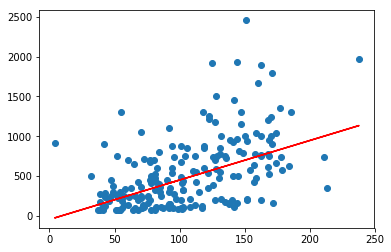

In [32]:
plt.scatter(X_train,y_train)
plt.plot(X_train,svr_pred,color='r')

In [33]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334345 + 5.172456135470686 x


In [34]:
-8.814095480334345 + 5.172456135470686 *91

461.87941284749803

Text(0, 0.5, 'Maaş (Salary)')

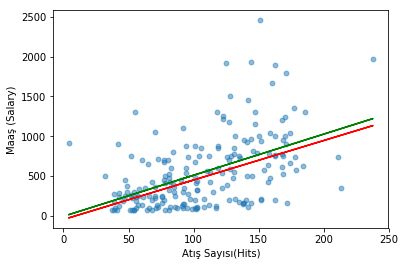

In [35]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, svr_pred, color='r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

In [36]:
# Tahmin 
print('y={0}+{1}x'.format(svr_model.intercept_[0], svr_model.coef_[0][0]))

y=-48.69756097561513+4.969512195122206x


In [37]:
svr_model.predict([[91]])

array([403.52804878])

In [39]:
y_pred=svr_model.predict(X_test)

In [40]:
np.sqrt(mean_squared_error(y_test,y_pred))

459.0187960365147

In [41]:
# Model Tuning 

In [42]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
svr_params={'C':np.arange(0.1,2,0.1)}
svr_cv_model=GridSearchCV(svr_model,svr_params,cv=10).fit(X_train,y_train)

In [52]:
pd.Series(svr_cv_model.best_params_)[0]

0.4

In [53]:
svr_tuned=SVR("linear",C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train,y_train)

In [54]:
y_pred=svr_tuned.predict(X_test)

In [49]:
np.sqrt(mean_squared_error(y_test,y_pred))# önceki

458.198966781116

In [55]:
np.sqrt(mean_squared_error(y_test,y_pred))# sonraki

367.5385297249052